# Домашняя работа №1

In [1]:
# Ноутбук для того, чтобы проверить работоспособность каждой программы

In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    axs.axis('off')
    plt.plot()
    
def plot_way(x, y) -> None:
    plt.plot(x, y, c='r')

# Задача №1 - Лабиринт

Реализуйте алгоритм поиска выхода из лабиринта по растровому изобажению.
Вам нужно написать код, который будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

Отрисуйте получившийся маршрут на карте с помощью функции ```plot_maze_path(img, coords)``` или воспользуйтесь вам известным графическим инструментом.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```. 

Оценивается __каждое__ успешное решение лабиринта.

In [4]:
from task_1 import find_way_from_maze

Загрузим тестовое изображение и отобразим его.

In [19]:
test_image = cv2.imread('task_1/20 by 20 orthogonal maze.png')  # загрузить тестовую картинку

Теперь ваша задача реализовать функцию ```plot_maze_path``` в ```task_1.py``` для того, чтобы найти координаты пути через лабиринт.

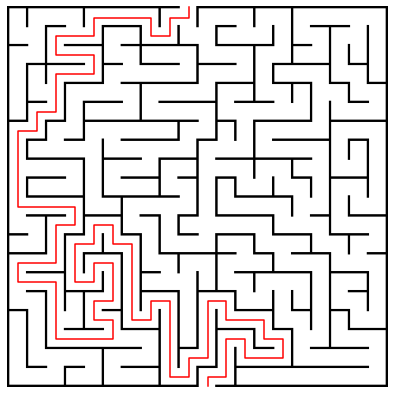

In [20]:
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт

plot_one_image(test_image)
plot_way(*way_coords)

# Задача №2 - Пробки в городе

Требуется написать программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях. 

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.


**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [7]:
from task_2 import find_road_number

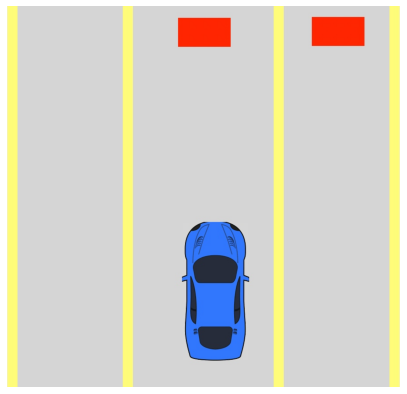

In [8]:
test_image = cv2.imread('task_2/image_02.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

Нужно перестроиться на дорогу номер 0


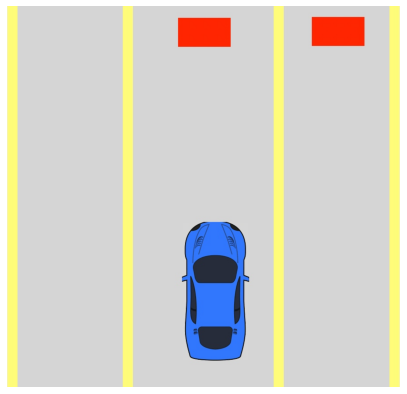

In [9]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)
road_number =  find_road_number(test_image)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plot_one_image(test_image)

print(f'Нужно перестроиться на дорогу номер {road_number}')

# Задача №3 - Аффинные преобразования

## Задача №3.1 - Поверни изображение

Реализуйте функцию, которая поворачивает изображение вокруг заданной точки на заданный угол ($0^\circ-360^\circ$) и преобразует размер изображения, чтобы оно не обрезалось после поворота.

In [10]:
from task_3 import rotate

(768, 1024, 3)


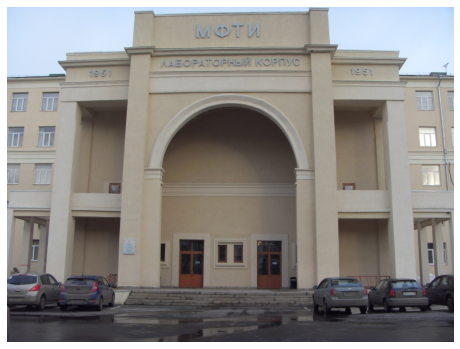

In [11]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
print(test_image.shape)

(1006, 1187, 3)


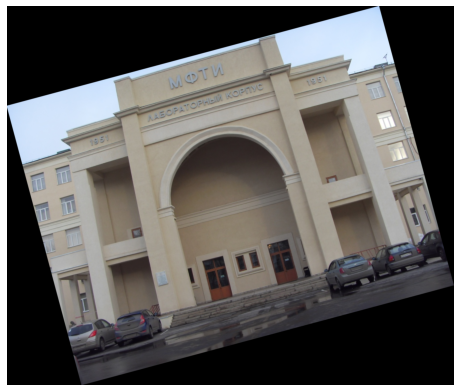

In [12]:
test_point = (200, 200)
test_angle = 15

transformed_image = rotate(test_image, test_point, test_angle)
plot_one_image(transformed_image)
print(transformed_image.shape)

Проверьте как это должно было получиться

(1007, 1188, 3)


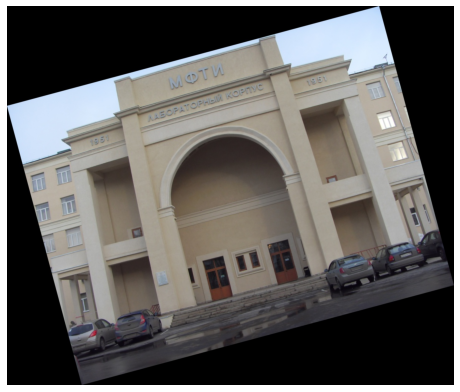

In [13]:
result_image = cv2.imread('task_3/lk_rotate.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)
print(result_image.shape)

## Задача №3.2 - Афинные преобразования

Реализуйте функцию, которая применяет афинное преобразование между заданными точками на исходном изображении и преобразует размер получившегося изображения, чтобы оно не обрезалось.

In [14]:
from task_3 import apply_warpAffine

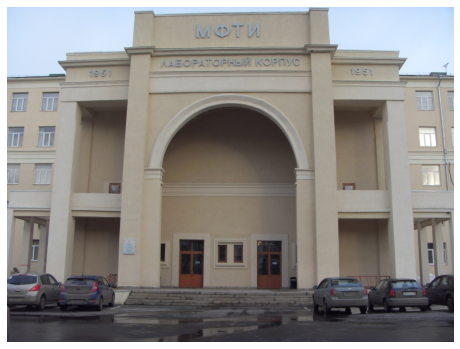

In [15]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

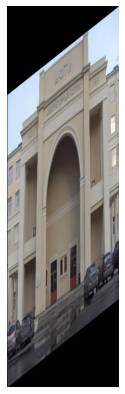

In [16]:
test_point_1 = np.float32([[50, 50], [400, 50], [50, 200]])
test_point_2 = np.float32([[100, 100], [200, 20], [100, 250]]) 

transformed_image = apply_warpAffine(test_image, test_point_1, test_point_2)
plot_one_image(transformed_image)

Проверьте как это должно было получиться

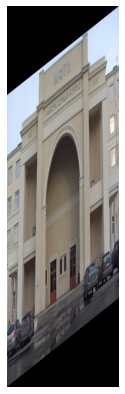

In [17]:
result_image = cv2.imread('task_3/lk_affine.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)

In [18]:
print('transformed_image', transformed_image.shape)
print('result_image', result_image.shape)

transformed_image (1000, 292, 3)
result_image (1003, 293, 3)
